In [8]:
import os
import io
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import random

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.inspection import permutation_importance

import joblib

print("Libraries imported.")

Libraries imported.


In [9]:
RND = 42
random.seed(RND)
np.random.seed(RND)

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

print("Notebook initialized. Random seed:", RND)

Notebook initialized. Random seed: 42


In [ ]:
df = pd.read_csv("/content/SimulatedCreditData.txt", sep='|', header=0)
print("Shape:", df.shape)
df.head(5)

Shape: (100000, 21)


,GB,Balance,CreditDuration,PaymentHistory,Purpose,CreditAmount,OtherAssets,JobDuration,EffortRate,CivilStatus,...,AddressDuration,LiquidAssets,Age,OutsideCredits,HomeType,InsideCredits,Job,Dependents,Phone,Foreigner
0,0,4,18,2,0,2333,5,5,4,2,...,4,1,57,3,2,1,3,1,2,1
1,0,2,36,4,0,3552,1,3,1,3,...,4,2,27,3,2,2,3,1,1,1
2,0,4,12,2,3,1346,2,5,3,2,...,4,2,22,3,2,2,4,1,1,1
3,1,1,36,4,2,1905,1,5,4,4,...,1,1,21,1,2,2,3,2,1,1
4,0,2,18,2,9,1572,1,1,2,3,...,4,3,35,3,2,1,3,1,2,1


Columns: ['GB', 'Balance', 'CreditDuration', 'PaymentHistory', 'Purpose', 'CreditAmount', 'OtherAssets', 'JobDuration', 'EffortRate', 'CivilStatus', 'Collateral', 'AddressDuration', 'LiquidAssets', 'Age', 'OutsideCredits', 'HomeType', 'InsideCredits', 'Job', 'Dependents', 'Phone', 'Foreigner']

Data types:
 GB                 int64
Balance            int64
CreditDuration     int64
PaymentHistory     int64
Purpose            int64
CreditAmount       int64
OtherAssets        int64
JobDuration        int64
EffortRate         int64
CivilStatus        int64
Collateral         int64
AddressDuration    int64
LiquidAssets       int64
Age                int64
OutsideCredits     int64
HomeType           int64
InsideCredits      int64
Job                int64
Dependents         int64
Phone              int64
Foreigner          int64
dtype: object

Dataset shape: (100000, 21)

Target distribution (GB):
GB
0    71464
1    28536
Name: count, dtype: int64
GB
0    0.71464
1    0.28536
Name: proportion

,count,mean,std,min,25%,50%,75%,max
GB,100000.0,0.28536,0.451588,0.0,0.0,0.0,1.0,1.0
Balance,100000.0,2.58106,1.258898,1.0,1.0,2.0,4.0,4.0
CreditDuration,100000.0,20.94507,12.068047,4.0,12.0,18.0,24.0,72.0
PaymentHistory,100000.0,2.54046,1.085198,0.0,2.0,2.0,4.0,4.0
Purpose,100000.0,2.82593,2.741730,0.0,1.0,2.0,3.0,10.0
CreditAmount,100000.0,3274.99263,2834.766651,250.0,1364.0,2319.0,3973.0,18424.0
OtherAssets,100000.0,2.09986,1.576456,1.0,1.0,1.0,3.0,5.0
JobDuration,100000.0,3.37733,1.207571,1.0,3.0,3.0,5.0,5.0
EffortRate,100000.0,2.96762,1.120296,1.0,2.0,3.0,4.0,4.0
CivilStatus,100000.0,2.68214,0.708611,1.0,2.0,3.0,3.0,4.0



Numeric cols: ['Balance', 'CreditDuration', 'PaymentHistory', 'Purpose', 'CreditAmount', 'OtherAssets', 'JobDuration', 'EffortRate', 'CivilStatus', 'Collateral', 'AddressDuration', 'LiquidAssets', 'Age', 'OutsideCredits', 'HomeType', 'InsideCredits', 'Job', 'Dependents', 'Phone', 'Foreigner']


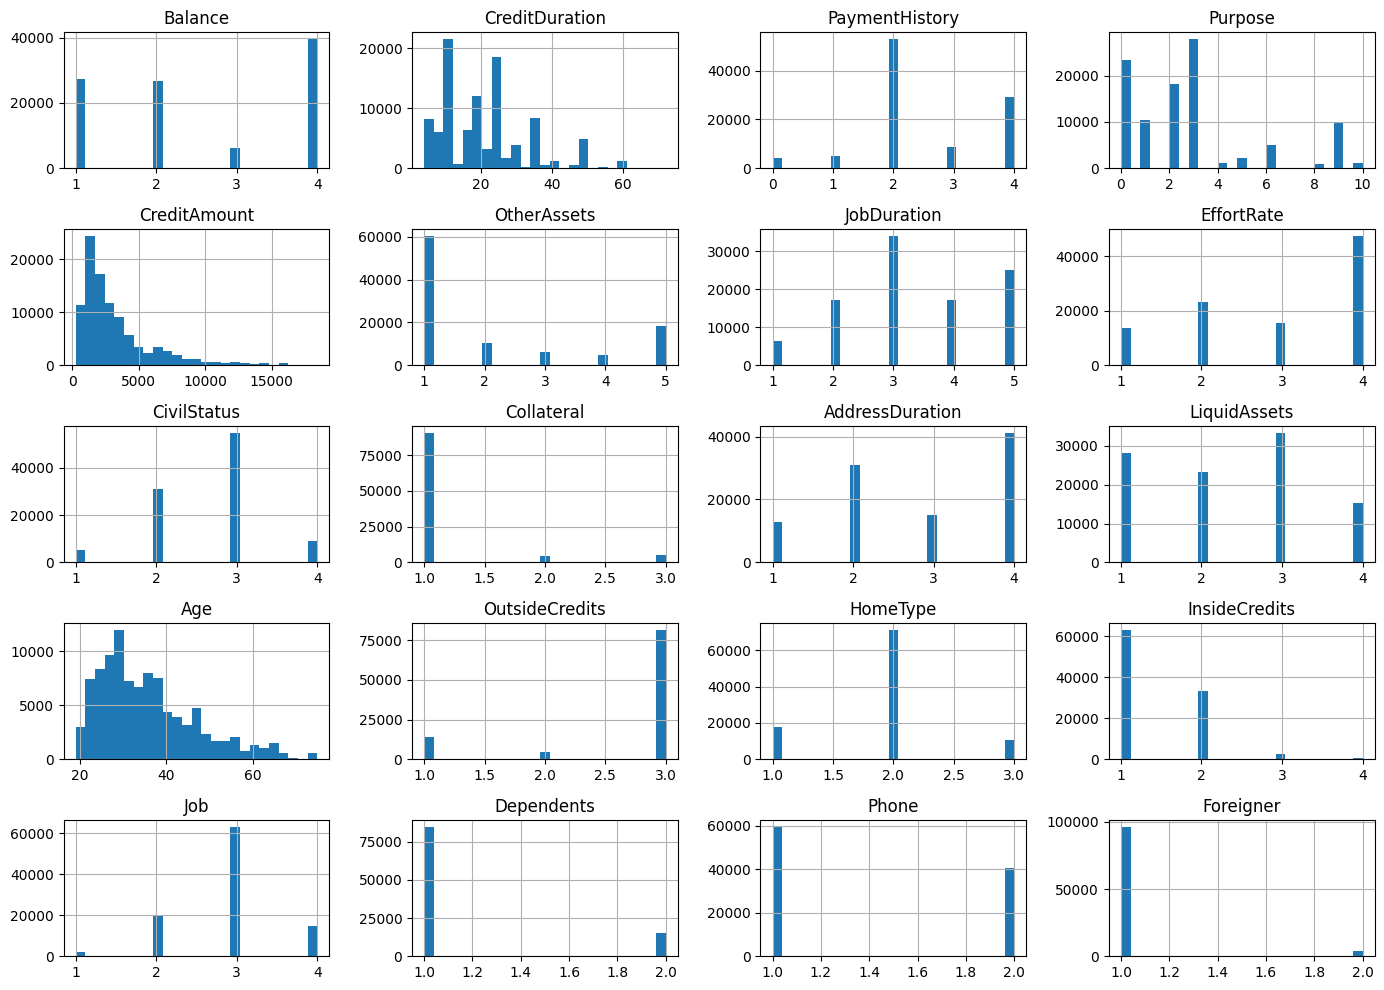

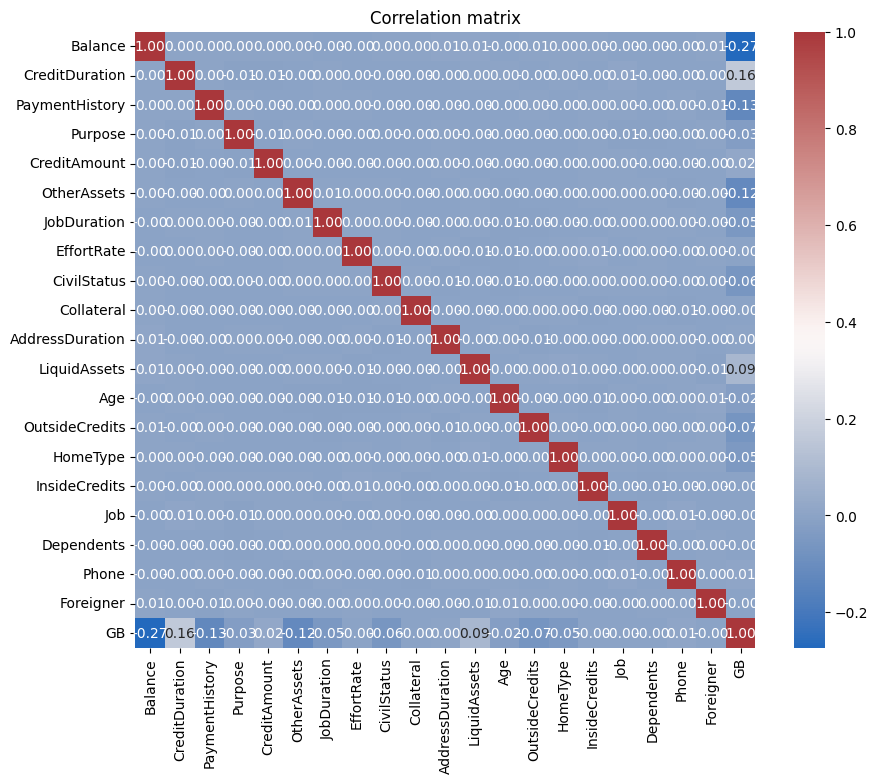

In [4]:
# Data Overvidw

print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)

# Basic info
print("\nDataset shape:", df.shape)
print("\nTarget distribution (GB):")
print(df['GB'].value_counts())
print(df['GB'].value_counts(normalize=True))

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic stats
display(df.describe(include='all').T)

# Histograms for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'GB']
print("\nNumeric cols:", numeric_cols)

_ = df[numeric_cols].hist(figsize=(14,10), bins=25)
plt.tight_layout()
plt.show()

# Correlation heatmap (numeric)
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ['GB']].corr(), annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation matrix")
plt.show()


In [6]:
# We'll:
# - create a few engineered features
# - handle missing values
# - remove duplicates
# - handle (simple) outliers by winsorizing numeric columns
# - build a sklearn ColumnTransformer for preprocess

# Copy df to avoid changing original
data = df.copy()

# Remove exact duplicates
n_dup = data.duplicated().sum()
print("Exact duplicates:", n_dup)
if n_dup > 0:
    data = data.drop_duplicates()
    print("Dropped duplicates. New shape:", data.shape)

# Basic feature engineering: ratio of assets to credit (helps model credit risk)
# ensure denominators not zero
data['TotalAssets'] = data['OtherAssets'] + data['LiquidAssets']
data['assets_to_credit'] = data['TotalAssets'] / (data['CreditAmount'] + 1e-6)  # small epsilon
# Also relative effort: EffortRate / CreditAmount (if EffortRate was e.g. monthly payment)
data['effort_per_credit'] = data['EffortRate'] / (data['CreditAmount'] + 1e-6)

# Check for missing after operations
print("Missing after FE:", data.isnull().sum().sum())

# Identify columns by type
target = 'GB'
features = [c for c in data.columns if c != target]

# treat a subset as categorical based on description (these are integers but categorical)
# From the description: Balance, PaymentHistory, Purpose, OtherAssets (ordinal?), CivilStatus, HomeType, Job, Phone, Foreigner, Collateral
# We'll treat low-cardinality ints as categorical
cat_cols = []
num_cols = []

for c in features:
    if data[c].nunique() <= 12 and c not in ['CreditAmount', 'CreditDuration', 'Age', 'TotalAssets', 'assets_to_credit', 'effort_per_credit', 'CreditAmount']:
        cat_cols.append(c)
    else:
        num_cols.append(c)

# But ensure numeric engineering features are numeric
# Force certain known numeric columns
for forced_num in ['CreditAmount', 'CreditDuration', 'Age', 'TotalAssets', 'assets_to_credit', 'effort_per_credit']:
    if forced_num in features and forced_num not in num_cols:
        num_cols.append(forced_num)
        if forced_num in cat_cols:
            cat_cols.remove(forced_num)

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# Simple outlier handling: clip numeric columns to 1st/99th percentiles (winsorizing)
def winsorize_df(df, cols, lower_q=0.01, upper_q=0.99):
    df = df.copy()
    for c in cols:
        low = df[c].quantile(lower_q)
        high = df[c].quantile(upper_q)
        df[c] = df[c].clip(lower=low, upper=high)
    return df

data[num_cols] = winsorize_df(data, num_cols, 0.01, 0.99)[num_cols]

# Build sklearn transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ], remainder='drop', verbose_feature_names_out=False
)

# A function to get feature names after preprocessing
def get_feature_names(preprocessor):
    num_features = preprocessor.transformers_[0][2]
    cat_pipe = preprocessor.transformers_[1][1]
    cat_features = preprocessor.transformers_[1][2]
    # after OneHotEncoder
    ohe = cat_pipe.named_steps['onehot']
    ohe_names = list(ohe.get_feature_names_out(cat_features))
    return list(num_features) + ohe_names

print("\nPreprocessor built. Example numeric and categorical features counts:")
print("num:", len(num_cols), "cat:", len(cat_cols))

Exact duplicates: 0
Missing after FE: 0
Numeric cols: ['CreditDuration', 'CreditAmount', 'Age', 'TotalAssets', 'assets_to_credit', 'effort_per_credit']
Categorical cols: ['Balance', 'PaymentHistory', 'Purpose', 'OtherAssets', 'JobDuration', 'EffortRate', 'CivilStatus', 'Collateral', 'AddressDuration', 'LiquidAssets', 'OutsideCredits', 'HomeType', 'InsideCredits', 'Job', 'Dependents', 'Phone', 'Foreigner']

Preprocessor built. Example numeric and categorical features counts:
num: 6 cat: 17


In [10]:
# Train/validation split

X = data[features]
y = data[target]

# Stratified split to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RND)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

# Define model pipelines
pipe_logreg = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=500, class_weight='balanced', random_state=RND))
])

pipe_rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_jobs=-1, random_state=RND, class_weight='balanced'))
])

# Quick baseline fit (default hyperparams)
print("Fitting baseline Logistic Regression...")
pipe_logreg.fit(X_train, y_train)
print("Fitting baseline Random Forest (small)...")
pipe_rf.set_params(clf__n_estimators=100, clf__max_depth=10)
pipe_rf.fit(X_train, y_train)

# Evaluate baseline on test
def evaluate_model(pipe, X_test, y_test, name="Model"):
    preds = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1:", f1_score(y_test, preds))
    if proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

evaluate_model(pipe_logreg, X_test, y_test, "Logistic Regression (baseline)")
evaluate_model(pipe_rf, X_test, y_test, "Random Forest (baseline)")

Train shape: (80000, 23) Test shape: (20000, 23)
Train class distribution:
 GB
0    0.714638
1    0.285363
Name: proportion, dtype: float64
Test class distribution:
 GB
0    0.71465
1    0.28535
Name: proportion, dtype: float64
Fitting baseline Logistic Regression...
Fitting baseline Random Forest (small)...

=== Logistic Regression (baseline) ===
Accuracy: 0.68585
Precision: 0.4663000234027615
Recall: 0.6982652882425092
F1: 0.5591805233985827
ROC AUC: 0.751150393236369
Confusion Matrix:
 [[9732 4561]
 [1722 3985]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76     14293
           1       0.47      0.70      0.56      5707

    accuracy                           0.69     20000
   macro avg       0.66      0.69      0.66     20000
weighted avg       0.74      0.69      0.70     20000


=== Random Forest (baseline) ===
Accuracy: 0.6786
Precision: 0.4573725907532222
Recall: 0.6777641492903452
F1: 0.54617339734538


=== Logistic Regression (baseline) ===
Accuracy: 0.68585
Precision: 0.4663000234027615
Recall: 0.6982652882425092
F1: 0.5591805233985827
ROC AUC: 0.751150393236369
Confusion Matrix:
 [[9732 4561]
 [1722 3985]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76     14293
           1       0.47      0.70      0.56      5707

    accuracy                           0.69     20000
   macro avg       0.66      0.69      0.66     20000
weighted avg       0.74      0.69      0.70     20000



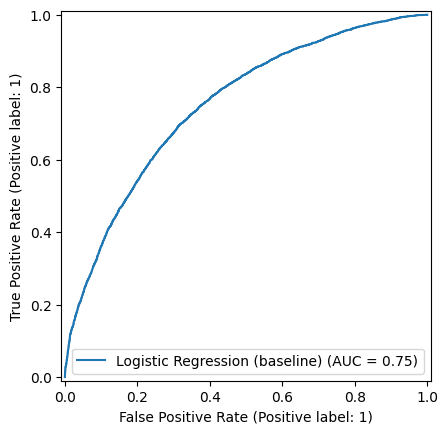

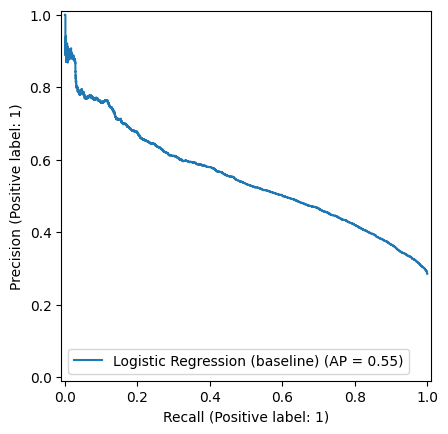


=== Random Forest (baseline) ===
Accuracy: 0.6786
Precision: 0.4573725907532222
Recall: 0.6777641492903452
F1: 0.5461733973453826
ROC AUC: 0.7408976232004277
Confusion Matrix:
 [[9704 4589]
 [1839 3868]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75     14293
           1       0.46      0.68      0.55      5707

    accuracy                           0.68     20000
   macro avg       0.65      0.68      0.65     20000
weighted avg       0.73      0.68      0.69     20000



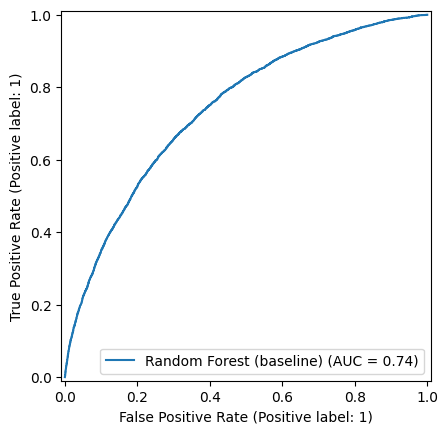

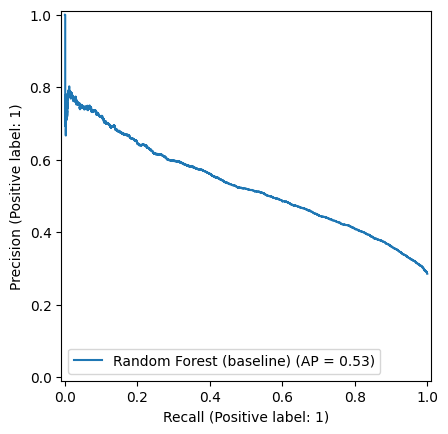

In [13]:
# Evaluate both models on the test set
def evaluate_model(pipe, X_test, y_test, name="Model"):
    preds = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1:", f1_score(y_test, preds))
    if proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

    # Plot ROC and PR curves
    if proba is not None:
        RocCurveDisplay.from_predictions(y_test, proba, name=name)
        plt.show()
        PrecisionRecallDisplay.from_predictions(y_test, proba, name=name)
        plt.show()


evaluate_model(pipe_logreg, X_test, y_test, "Logistic Regression (baseline)")
evaluate_model(pipe_rf, X_test, y_test, "Random Forest (baseline)")


Total engineered features: 74

Top Logistic Regression features:


,feature,coef,abs_coef
6,Balance_1,0.839774,0.839774
9,Balance_4,-0.834560,0.834560
10,PaymentHistory_0,0.641890,0.641890
14,PaymentHistory_4,-0.629224,0.629224
53,LiquidAssets_4,0.443059,0.443059
50,LiquidAssets_1,-0.422075,0.422075
0,CreditDuration,0.401974,0.401974
25,OtherAssets_1,0.334075,0.334075
39,CivilStatus_1,0.331193,0.331193
42,CivilStatus_4,-0.323725,0.323725


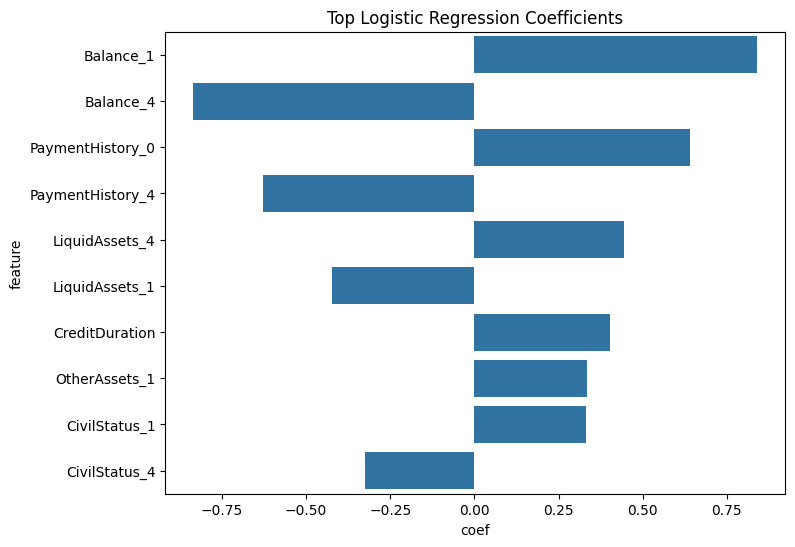


Top Random Forest feature importances:


,feature,importance
9,Balance_4,0.240839
6,Balance_1,0.141392
0,CreditDuration,0.105183
14,PaymentHistory_4,0.046794
3,TotalAssets,0.036320
25,OtherAssets_1,0.030262
7,Balance_2,0.028834
29,OtherAssets_5,0.028478
4,assets_to_credit,0.024938
1,CreditAmount,0.023564


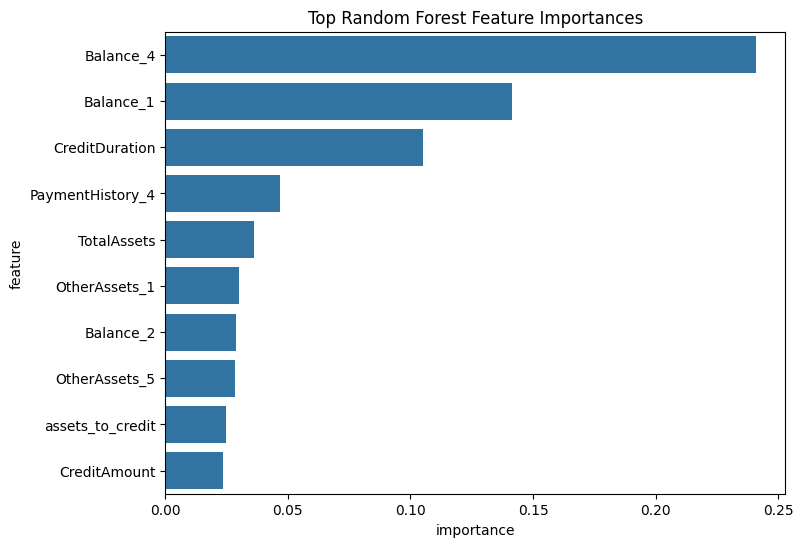

In [14]:
# model_explainability

# Extract the fitted preprocessor
preprocessor_fitted = pipe_rf.named_steps['pre']

# Get feature names after preprocessing
num_features = preprocessor_fitted.transformers_[0][2]
ohe = preprocessor_fitted.transformers_[1][1].named_steps['onehot']
ohe_features = list(ohe.get_feature_names_out(preprocessor_fitted.transformers_[1][2]))
feature_names = list(num_features) + ohe_features

print(f"Total engineered features: {len(feature_names)}")

# Logistic Regression coefficients
if hasattr(pipe_logreg.named_steps['clf'], 'coef_'):
    coef = pipe_logreg.named_steps['clf'].coef_.flatten()
    coef_df = pd.DataFrame({'feature': feature_names, 'coef': coef})
    coef_df['abs_coef'] = coef_df['coef'].abs()
    coef_df = coef_df.sort_values('abs_coef', ascending=False)
    print("\nTop Logistic Regression features:")
    display(coef_df.head(15))

    plt.figure(figsize=(8,6))
    sns.barplot(x='coef', y='feature', data=coef_df.head(10))
    plt.title('Top Logistic Regression Coefficients')
    plt.show()

# Random Forest feature importance
rf_model = pipe_rf.named_steps['clf']
if hasattr(rf_model, 'feature_importances_'):
    fi_df = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nTop Random Forest feature importances:")
    display(fi_df.head(15))

    plt.figure(figsize=(8,6))
    sns.barplot(x='importance', y='feature', data=fi_df.head(10))
    plt.title('Top Random Forest Feature Importances')
    plt.show()


Computing permutation importance for Random Forest...
Permutation array length: 23, feature_names length: 74

Top permutation-based features:


,feature,perm_mean,perm_std
0,CreditDuration,0.096715,0.002169
1,CreditAmount,0.015125,0.001094
2,Age,0.013325,0.000880
5,effort_per_credit,0.010610,0.001671
11,PaymentHistory_1,0.003970,0.001191
13,PaymentHistory_3,0.002710,0.000802
14,PaymentHistory_4,0.001560,0.000776
20,Purpose_5,0.000710,0.001180
6,Balance_1,0.000675,0.000730
7,Balance_2,0.000665,0.000310


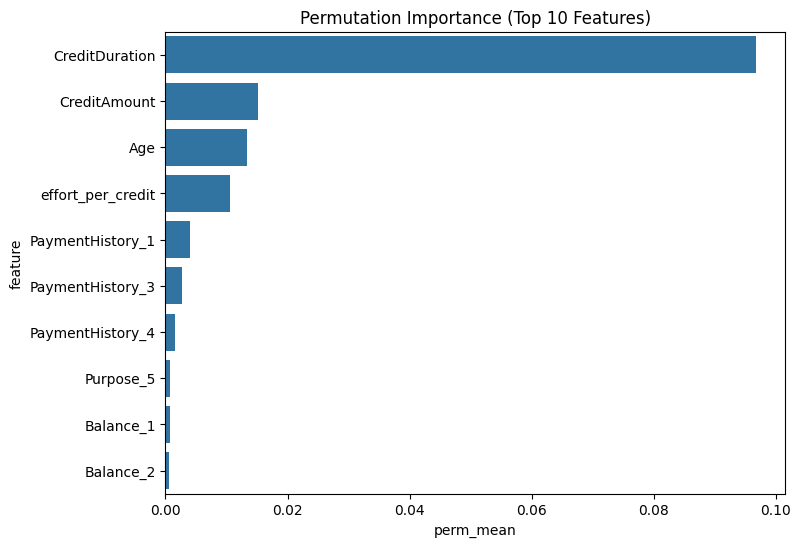

In [16]:
print("Computing permutation importance for Random Forest...")

# Extract fitted preprocessor and get correct feature names
preprocessor_fitted = pipe_rf.named_steps['pre']
num_features = preprocessor_fitted.transformers_[0][2]
ohe = preprocessor_fitted.transformers_[1][1].named_steps['onehot']
ohe_features = list(ohe.get_feature_names_out(preprocessor_fitted.transformers_[1][2]))
feature_names = list(num_features) + ohe_features

# Compute permutation importance on the *whole pipeline*
perm = permutation_importance(pipe_rf, X_test, y_test, n_repeats=10, random_state=RND, n_jobs=-1)

# Ensure lengths match
print(f"Permutation array length: {len(perm.importances_mean)}, feature_names length: {len(feature_names)}")

# In rare cases, ColumnTransformer may drop some columns — truncate to match
min_len = min(len(feature_names), len(perm.importances_mean))
perm_df = pd.DataFrame({
    'feature': feature_names[:min_len],
    'perm_mean': perm.importances_mean[:min_len],
    'perm_std': perm.importances_std[:min_len]
}).sort_values('perm_mean', ascending=False)

print("\nTop permutation-based features:")
display(perm_df.head(15))

plt.figure(figsize=(8,6))
sns.barplot(x='perm_mean', y='feature', data=perm_df.head(10))
plt.title('Permutation Importance (Top 10 Features)')
plt.show()